# DATA PRE-PROCESSING - Advanced study of epigenetic mechanisms in the development of neoplasms 

In this notebook, I will evaluate and define the most appropriate **pre-processing operations** (in the next notebook), also in relation to the thesis work of *Nastaran Ahmadi Bonakdare* and the procedures described in the article “*Early detection and diagnosis of cancer with interpretable machine learning to uncover cancer-specific DNA methylation patterns*” (Izzy Newsham et al., MRC Cancer Unit, University of Cambridge).

### Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_abs_deviation
import warnings

warnings.filterwarnings('ignore')

### Import dataset 

In [2]:
# Find dataset's path 
file_path = '/kaggle/input/raw-dataset/GSE69914_series_matrix.csv'  # file's path
raw_dataset = pd.read_csv(file_path)

# Delete the first column relating to the CpG index
raw_dataset.set_index('ID_REF', inplace=True)

# I transpose the dataset so that each row represents a sample and each column corresponds to a CpG site (feature)
raw_dataset = raw_dataset.T

## Data Pre-Processing
### Step 1 — Sample Grouping and Label Assignment

As a first preprocessing step, the samples were grouped into three biological categories based on the classification reported on the GEO portal **[1]**, as referenced in Bonakdare’s work. Specifically, the dataset includes 407 samples in total, which were assigned to one of the following groups:

* **0** = Normal
* **1** = Adjacent-normal
* **2** = Tumor

All samples were retained, including those characterized as BRCA1-normal and BRCA1-tumor, which were incorporated into the respective normal and tumor groups for this initial stage. This labeling provides a consistent structure for downstream preprocessing and analysis.

**Open consideration — BRCA1-specific samples:**
A question arises regarding the treatment of BRCA1-positive samples currently embedded within the normal and tumor classes. Given the relatively limited sample size, is it more appropriate to retain these cases within their broader biological groups (as done here), remove them to avoid potential confounding, or define them as separate categories for downstream stratification? For the moment, they have been included in the main classes, with the option of excluding or reclassifying them at a later stage without affecting the current workflow.

- `normal_brca1_samples = ['GSM1712378', 'GSM1712392', 'GSM1712420', 'GSM1712442', 'GSM1712476', 'GSM1712560', 'GSM1712650', 'GSM1712724']`
- `cancer_brca1_samples = ['GSM1712411', 'GSM1712427', 'GSM1712636']`

If batch correction becomes necessary at a later stage, I can retrieve technical batch information from the GEO sample pages (GSM entries). Each GSM record typically includes a ‘Sentrix ID’ or ‘methylation barcode’, which identifies the slide or array on which the sample was processed. These slide-level identifiers can be used to group samples into technical batches. Including such batch covariates in downstream analysis (e.g., during normalization or differential methylation testing) can help remove non-biological variation introduced by processing differences across arrays or time. This step would only be required if exploratory analyses later reveal clustering, bias, or unwanted variability that is not explained by biological groups alone.

In [3]:
# Each sample is assigned a status: normal, adjacent, tumour

# 0 - Normal
normal_samples = [
    'GSM1712369', 'GSM1712385', 'GSM1712398', 'GSM1712412', 'GSM1712419', 'GSM1712423',
    'GSM1712435', 'GSM1712439', 'GSM1712440', 'GSM1712449', 'GSM1712464', 'GSM1712472',
    'GSM1712489', 'GSM1712490', 'GSM1712504', 'GSM1712535', 'GSM1712541', 'GSM1712551',
    'GSM1712565', 'GSM1712566', 'GSM1712574', 'GSM1712578', 'GSM1712583', 'GSM1712598',
    'GSM1712609', 'GSM1712615', 'GSM1712620', 'GSM1712625', 'GSM1712633', 'GSM1712648',
    'GSM1712649', 'GSM1712660', 'GSM1712661', 'GSM1712664', 'GSM1712678', 'GSM1712682',
    'GSM1712683', 'GSM1712693', 'GSM1712700', 'GSM1712713', 'GSM1712721', 'GSM1712723',
    'GSM1712733', 'GSM1712745', 'GSM1712755', 'GSM1712763', 'GSM1712772', 'GSM1712776', 
    'GSM1712378', 'GSM1712392', 'GSM1712420', 'GSM1712442', 'GSM1712476', 'GSM1712560',
    'GSM1712650', 'GSM1712724'
]

# 1 - Adjacent-Normal
adjacent_normal_samples = [
    'GSM1712368', 'GSM1712372', 'GSM1712383', 'GSM1712390', 'GSM1712405', 'GSM1712436',
    'GSM1712450', 'GSM1712457', 'GSM1712465', 'GSM1712466', 'GSM1712473', 'GSM1712475',
    'GSM1712487', 'GSM1712500', 'GSM1712503', 'GSM1712510', 'GSM1712511', 'GSM1712520',
    'GSM1712523', 'GSM1712528', 'GSM1712538', 'GSM1712548', 'GSM1712549', 'GSM1712558',
    'GSM1712572', 'GSM1712581', 'GSM1712595', 'GSM1712597', 'GSM1712606', 'GSM1712610',
    'GSM1712611', 'GSM1712612', 'GSM1712613', 'GSM1712614', 'GSM1712616', 'GSM1712632',
    'GSM1712642', 'GSM1712644', 'GSM1712672', 'GSM1712687', 'GSM1712701', 'GSM1712706',
    'GSM1712708', 'GSM1712727', 'GSM1712737', 'GSM1712739', 'GSM1712743', 'GSM1712752',
    'GSM1712777'
]

# 2 - Breast Cancer
breast_cancer_samples = [
    'GSM1712367', 'GSM1712370', 'GSM1712371', 'GSM1712373', 'GSM1712374', 'GSM1712375',
    'GSM1712376', 'GSM1712377', 'GSM1712379', 'GSM1712380', 'GSM1712382', 'GSM1712381',
    'GSM1712384', 'GSM1712386', 'GSM1712387', 'GSM1712388', 'GSM1712389', 'GSM1712391',
    'GSM1712393', 'GSM1712394', 'GSM1712395', 'GSM1712396', 'GSM1712397', 'GSM1712399',
    'GSM1712400', 'GSM1712401', 'GSM1712402', 'GSM1712403', 'GSM1712404', 'GSM1712406',
    'GSM1712407', 'GSM1712408', 'GSM1712409', 'GSM1712410', 'GSM1712413', 'GSM1712414',
    'GSM1712415', 'GSM1712416', 'GSM1712417', 'GSM1712418', 'GSM1712421', 'GSM1712422',
    'GSM1712424', 'GSM1712425', 'GSM1712426', 'GSM1712428', 'GSM1712429', 'GSM1712430',
    'GSM1712431', 'GSM1712432', 'GSM1712433', 'GSM1712434', 'GSM1712437', 'GSM1712438',
    'GSM1712441', 'GSM1712443', 'GSM1712444', 'GSM1712445', 'GSM1712446', 'GSM1712447',
    'GSM1712448', 'GSM1712451', 'GSM1712452', 'GSM1712453', 'GSM1712454', 'GSM1712455',
    'GSM1712456', 'GSM1712458', 'GSM1712459', 'GSM1712460', 'GSM1712461', 'GSM1712462',
    'GSM1712463', 'GSM1712467', 'GSM1712468', 'GSM1712469', 'GSM1712470', 'GSM1712471',
    'GSM1712474', 'GSM1712477', 'GSM1712478', 'GSM1712479', 'GSM1712480', 'GSM1712482',
    'GSM1712483', 'GSM1712484', 'GSM1712485', 'GSM1712486', 'GSM1712488', 'GSM1712491',
    'GSM1712492', 'GSM1712493', 'GSM1712494', 'GSM1712495', 'GSM1712496', 'GSM1712497',
    'GSM1712498', 'GSM1712499', 'GSM1712501', 'GSM1712502', 'GSM1712505', 'GSM1712506',
    'GSM1712507', 'GSM1712508', 'GSM1712509', 'GSM1712481', 'GSM1712512', 'GSM1712513',
    'GSM1712514', 'GSM1712515', 'GSM1712516', 'GSM1712517', 'GSM1712518', 'GSM1712519',
    'GSM1712521', 'GSM1712522', 'GSM1712524', 'GSM1712525', 'GSM1712526', 'GSM1712527',
    'GSM1712529', 'GSM1712530', 'GSM1712531', 'GSM1712532', 'GSM1712533', 'GSM1712534',
    'GSM1712536', 'GSM1712537', 'GSM1712539', 'GSM1712540', 'GSM1712542', 'GSM1712543',
    'GSM1712544', 'GSM1712545', 'GSM1712546', 'GSM1712547', 'GSM1712550', 'GSM1712552',
    'GSM1712553', 'GSM1712554', 'GSM1712555', 'GSM1712556', 'GSM1712557', 'GSM1712559',
    'GSM1712561', 'GSM1712562', 'GSM1712563', 'GSM1712564', 'GSM1712567', 'GSM1712568',
    'GSM1712569', 'GSM1712570', 'GSM1712571', 'GSM1712573', 'GSM1712575', 'GSM1712576',
    'GSM1712577', 'GSM1712579', 'GSM1712580', 'GSM1712582', 'GSM1712584', 'GSM1712585',
    'GSM1712586', 'GSM1712587', 'GSM1712588', 'GSM1712589', 'GSM1712590', 'GSM1712591',
    'GSM1712592', 'GSM1712593', 'GSM1712594', 'GSM1712596', 'GSM1712599', 'GSM1712600',
    'GSM1712601', 'GSM1712602', 'GSM1712603', 'GSM1712604', 'GSM1712605', 'GSM1712607',
    'GSM1712608', 'GSM1712617', 'GSM1712618', 'GSM1712619', 'GSM1712621', 'GSM1712622',
    'GSM1712623', 'GSM1712624', 'GSM1712626', 'GSM1712627', 'GSM1712628', 'GSM1712629',
    'GSM1712630', 'GSM1712631', 'GSM1712634', 'GSM1712635', 'GSM1712637', 'GSM1712638',
    'GSM1712639', 'GSM1712640', 'GSM1712641', 'GSM1712643', 'GSM1712645', 'GSM1712646',
    'GSM1712647', 'GSM1712651', 'GSM1712652', 'GSM1712653', 'GSM1712654', 'GSM1712655',
    'GSM1712656', 'GSM1712657', 'GSM1712658', 'GSM1712659', 'GSM1712662', 'GSM1712663',
    'GSM1712665', 'GSM1712666', 'GSM1712667', 'GSM1712668', 'GSM1712669', 'GSM1712670',
    'GSM1712671', 'GSM1712673', 'GSM1712674', 'GSM1712675', 'GSM1712676', 'GSM1712677',
    'GSM1712679', 'GSM1712680', 'GSM1712681', 'GSM1712684', 'GSM1712685', 'GSM1712686',
    'GSM1712688', 'GSM1712689', 'GSM1712690', 'GSM1712691', 'GSM1712692', 'GSM1712694',
    'GSM1712695', 'GSM1712696', 'GSM1712697', 'GSM1712698', 'GSM1712699', 'GSM1712702',
    'GSM1712703', 'GSM1712704', 'GSM1712705', 'GSM1712707', 'GSM1712709', 'GSM1712710',
    'GSM1712711', 'GSM1712712', 'GSM1712714', 'GSM1712715', 'GSM1712716', 'GSM1712717',
    'GSM1712718', 'GSM1712719', 'GSM1712720', 'GSM1712722', 'GSM1712725', 'GSM1712726',
    'GSM1712728', 'GSM1712729', 'GSM1712730', 'GSM1712731', 'GSM1712732', 'GSM1712734',
    'GSM1712735', 'GSM1712736', 'GSM1712738', 'GSM1712740', 'GSM1712741', 'GSM1712742',
    'GSM1712744', 'GSM1712746', 'GSM1712747', 'GSM1712748', 'GSM1712749', 'GSM1712750',
    'GSM1712751', 'GSM1712753', 'GSM1712754', 'GSM1712756', 'GSM1712758', 'GSM1712760',
    'GSM1712766', 'GSM1712767', 'GSM1712768', 'GSM1712769', 'GSM1712770', 'GSM1712771',
    'GSM1712773', 'GSM1712774', 'GSM1712775', 'GSM1712778', 'GSM1712779', 'GSM1712411', 
    'GSM1712427', 'GSM1712636'
]

In [4]:
# Create a lookup dictionary for faster and cleaner mapping
label_map = {
    **{sample: 0 for sample in normal_samples},
    **{sample: 1 for sample in adjacent_normal_samples},
    **{sample: 2 for sample in breast_cancer_samples}    
}

# Assign labels using the dictionary
raw_dataset['label'] = raw_dataset.index.map(label_map)

# Remove samples without an assigned label -> TODO only if I choose to eliminate normal_brca1_samples and cancer_brca1_samples
# data = data.dropna(subset=['label'])

# Convert label column to integer
raw_dataset['label'] = raw_dataset['label'].astype(int)

print(f"Dataset shape: {raw_dataset.shape}" )

# Preview the final dataset
raw_dataset.head()

Dataset shape: (407, 485513)


ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.X.938089F,ch.X.94051109R,ch.X.94260649R,ch.X.967194F,ch.X.97129969R,ch.X.97133160R,ch.X.97651759F,ch.X.97737721F,ch.X.98007042R,label
GSM1712367,0.258254,0.986116,0.889916,0.247964,0.902621,0.481930,0.839584,0.403095,0.205147,0.012563,...,0.010076,0.017305,0.043877,0.164719,0.002110,0.051155,0.008278,0.058859,0.035424,2
GSM1712368,0.197553,0.981426,0.826830,0.343906,0.868874,0.531370,0.702531,0.170696,0.124332,0.017907,...,0.005971,0.012350,0.034275,0.168426,0.034879,0.072710,0.051845,0.084556,0.044961,1
GSM1712369,0.275187,0.972137,0.839431,0.216030,0.837979,0.526388,0.761244,0.234515,0.185712,0.018421,...,0.016593,0.019087,0.032228,0.104366,0.058810,0.029021,0.018309,0.054741,0.033543,0
GSM1712370,0.150849,0.984434,0.950852,0.576088,0.931236,0.602277,0.677764,0.314696,0.498028,0.020209,...,0.006860,0.032156,0.044764,0.181600,0.029233,0.042169,0.016153,0.033154,0.038842,2
GSM1712371,0.240538,0.987393,0.897285,0.616293,0.915173,0.416164,0.791098,0.692240,0.525042,0.022303,...,0.000016,0.008709,0.022681,0.108381,0.023234,0.016129,0.011282,0.045345,0.052693,2


### Step 2 - Comparison of Beta-value and M-value methods for quantifying methylation levels **[2]**

#### Definitions and formulas

**Input signals (conceptual):** Illumina Infinium measures two background-adjusted probe intensities per CpG: methylated (y^{(M)}) and unmethylated (y^{(U)}).

**Beta-value (($\beta$)).** Fraction of methylated signal over total signal, stabilized with a small offset (\alpha) in the denominator:
$$
\beta_i ;=; \frac{\max!\big(y^{(M)}_i,0\big)}{\max!\big(y^{(M)}_i,0\big)+\max!\big(y^{(U)}_i,0\big)+\alpha},
\qquad 0\le \beta_i \le 1.
$$

**M-value ((M)).** Log-ratio (base 2) of methylated to unmethylated intensities with a small offset (a) in each channel:
$$
M_i ;=; \log_2!\left(\frac{\max!\big(y^{(M)}_i,0\big)+a}{\max!\big(y^{(U)}_i,0\big)+a}\right)\in(-\infty,\infty).
$$

**Link between ($\beta$) and (M)** (ignoring offsets at typical intensities):
$$
\beta_i ;=; \frac{2^{M_i}}{1+2^{M_i}}
\quad\Longleftrightarrow\quad
M_i ;=; \log_2!\left(\frac{\beta_i}{1-\beta_i}\right).
$$

#### Key findings in the paper (what I aim to reproduce)

* **Scale and variance.** ($\beta$) is bounded ([0,1]) and **heteroscedastic** (its variance depends on the mean, especially near 0 and 1), while (M) is approximately **homoscedastic** across the methylation range and better suited to linear-model/t-test pipelines.
* **Visibility of biology.** Distributions of (M) reveal **bimodality** (unmethylated vs methylated modes) more clearly than ($\beta$), which is **compressed** at the extremes.
* **Practical recommendation.** Analyze differential methylation in **M-space**, then convert to ($\beta$) for reporting/interpretation.


#### What I replicated and what I could not (and why)

**Available data constraint.** Our GEO matrix contains **($\beta$a) values only** (no raw channel intensities (y^{(M)}, y^{(U)})). In the paper, intensities were quality-controlled and normalized (GenomeStudio/`lumi`), and then both ($\beta$) and (M) were derived from those normalized intensities.
**Our workaround (standard in practice):** compute
$$
M=\log_2!\Big(\tfrac{\beta+\varepsilon}{1-\beta+\varepsilon}\Big)
$$
with a tiny (\varepsilon) for numerical stability. This reproduces the **scale** and **theoretical relationship** faithfully, even though we cannot re-do intensity-level normalization.

**Replicates.** The paper’s variance plots (their Fig. 3) use **technical replicates**; we used **biological samples** (either pooled across all samples or within a homogeneous group such as Normal or Tumor). This is the closest surrogate available; it may include biological variability, but the expected **patterns** (heteroscedastic ($\beta$), flatter (M)) should still emerge—which they do.


#### What the code does—and why (plot-by-plot)

**Figure 1 — *Empirical vs theoretical relationship (single samples)***

* **What I plot.** For **one Tumor** sample and **one Normal** sample:

  * A **theoretical** logit curve (M=f($\beta$)) (blue dashed).
  * The **empirical** scatter of all CpGs from that sample, shown as tiny **red** points.
* **Why this matches the paper.** Their Fig. 1 formalizes the same link: (M) vs ($\beta$) through a logit transform; drawing a **single sample** is the intended demonstration of how real CpG pairs fall on the theoretical curve.
* **What I see / interpretation.** Your red points **closely follow** the dashed curve in both Tumor and Normal, confirming that:

  1. our (M) computed from ($\beta$) lands on the same scale;
  2. the **nonlinearity** at the extremes is visible (small ($\beta$) changes correspond to large (M) changes near 0/1).

**Figure 2 — *Histograms for a “typical” Tumor and Normal sample (Beta vs M)***

* **What I plot.** A 2×2 panel: for **Tumor** and **Normal**, we show the histograms of ($\beta$) and of (M).
* **Why this matches the paper.** Their Fig. 2 contrasts how **($\beta$)** compresses values near 0/1, while **(M)** spreads them on an unbounded log-ratio scale, making modes more visible.
* **What I see / interpretation.**

  * In **($\beta$)**, mass accumulates toward 0 and 1 (compression). Mid-range variation is more visible than extremes.
  * In **(M)**, distributions show pronounced **bimodality** (unmethylated vs methylated states) and a clearer separation—exactly the behavior the paper emphasizes as beneficial for downstream testing.

**Figure 3 — *Mean–SD relationship by group (Normal vs Tumor) and metric (Beta vs M)***

* **What I plot.** For **Normal** and **Tumor** groups separately:

  * For each CpG, we compute **mean across samples** and **SD across samples** (within that group).
  * We overlay a **local median SD trend** (red line) over the scatter, exactly to mimic the “local trend” diagnostic in the paper’s Fig. 3.
* **Why this approximates the paper.** They used **technical replicates** to probe noise structure; we do the same diagnostic **within a homogeneous group**, which removes most between-group biology and comes closest to replicate-style variability.
* **What I see / interpretation.**

  * **($\beta$)** panels (Normal & Tumor): SD is **mean-dependent**—low near the center and higher toward extremes (the classic “U-shaped” heteroscedasticity). This reproduces the core claim that ($\beta$) violates equal-variance assumptions near 0/1.
  * **(M)** panels: the red trend is comparatively **flatter** across its mean range, indicating **approximate homoscedasticity**. Minor curvature or elevation can persist (because we use biological replicates and ($\beta$)-derived (M)), but the qualitative behavior is the same as in the paper.


* **Why (M)-values for inference.** The paper’s rationale is confirmed here: (M) has **near-constant variance** and an **unbounded, symmetric** scale that is well-behaved for linear models and t-tests.
* **Why keep ($\beta$) for presentation.** ($\beta$) is directly interpretable as a **percentage-like proportion** and is thus ideal for **reporting and plots** intended for biological readers.
* **Our practical path forward.**

  1. **Analyze in (M)-space** (model fitting, differential methylation testing, thresholds).
  2. **Report in ($\beta$)** (tables, figures, narrative).
  3. When intensities are unavailable (our case), the ($\beta$!\to!M) logit transform reproduces the statistical advantages of (M) well enough for inference, provided we acknowledge the limitation (no intensity-level normalization).


#### Limitations

* **No intensity-level normalization.** I cannot apply the exact GenomeStudio/`lumi` preprocessing used in the paper. If IDATs or channel intensities become available, we should redo the pipeline at that level.
* **No technical replicates.** Our Fig. 3 uses **within-group biological samples** as a surrogate. This is acceptable for assessing overall variance structure, but it is not a perfect substitute for technical replicate noise.



Following **[2]** and supported by our replications above, I will **use M-values for statistical analyses** (differential methylation, linear modeling, thresholding), and **convert results back to Beta-values for interpretability and reporting**. This approach maximizes statistical validity while retaining biological clarity.

Matrix shape (samples x CpGs): (407, 485512)
Label counts:
 label
2    302
0     56
1     49
Name: count, dtype: int64
Computed matrices -> Beta: (407, 485512)  | M: (407, 485512)
Tumor sample for Fig.1–2: GSM1712367
Normal sample for Fig.1–2: GSM1712369


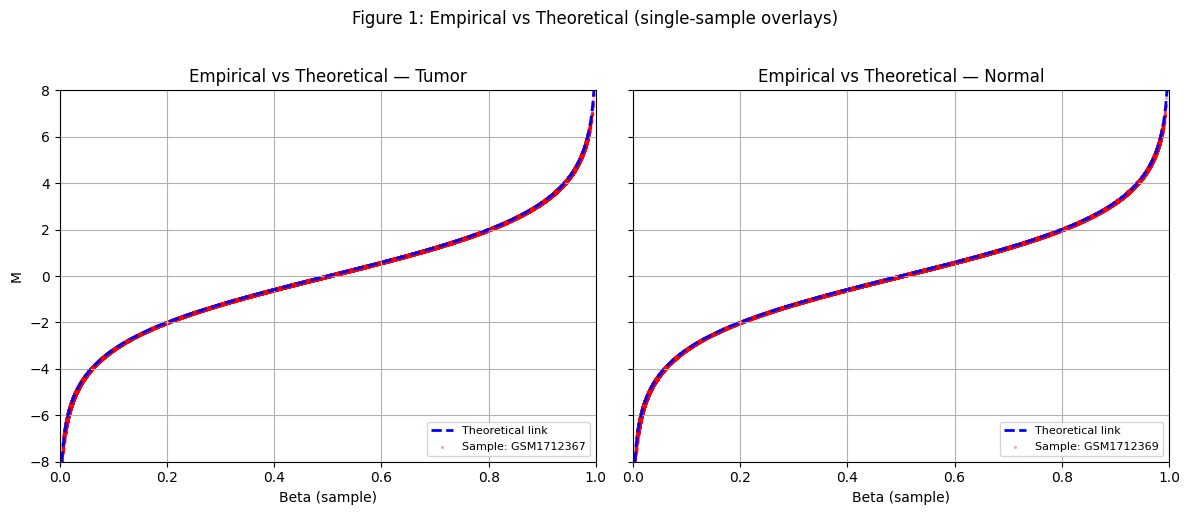

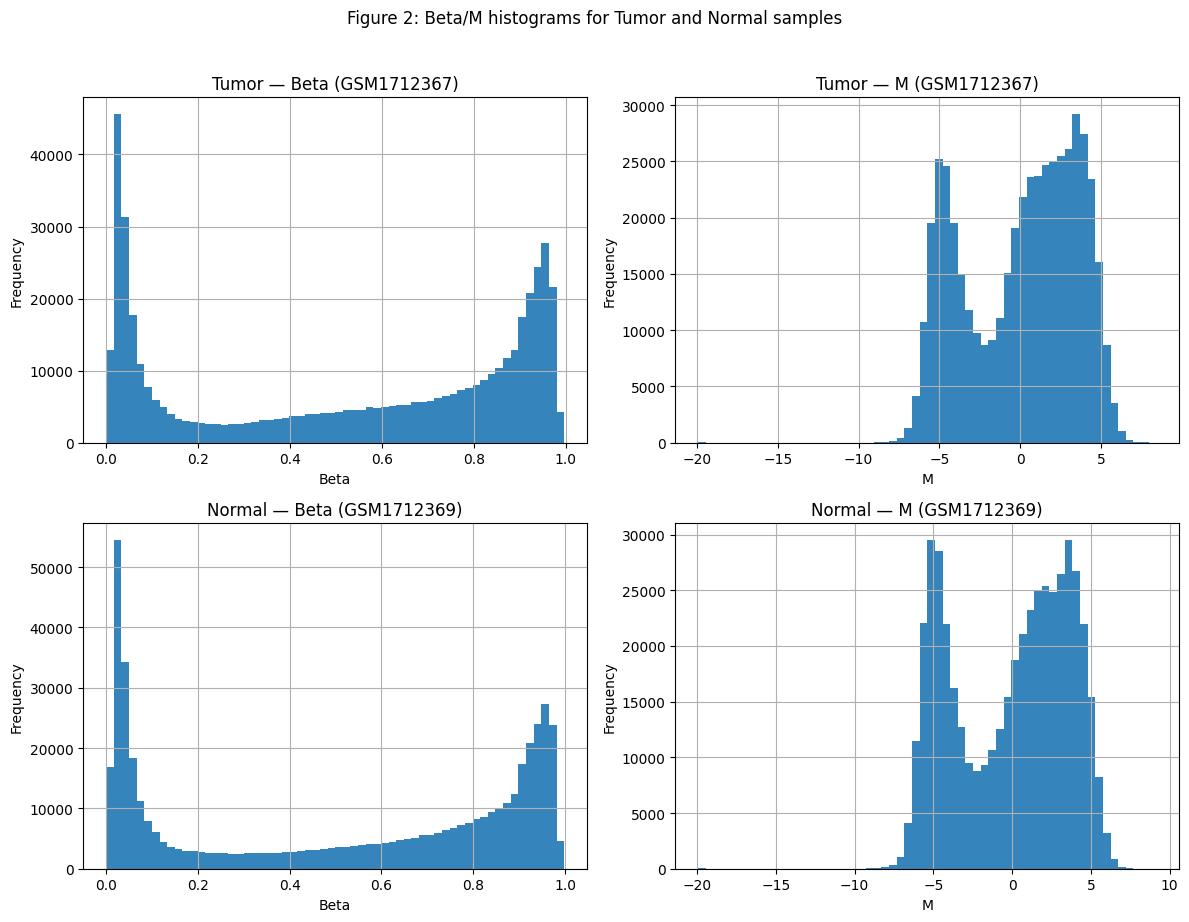

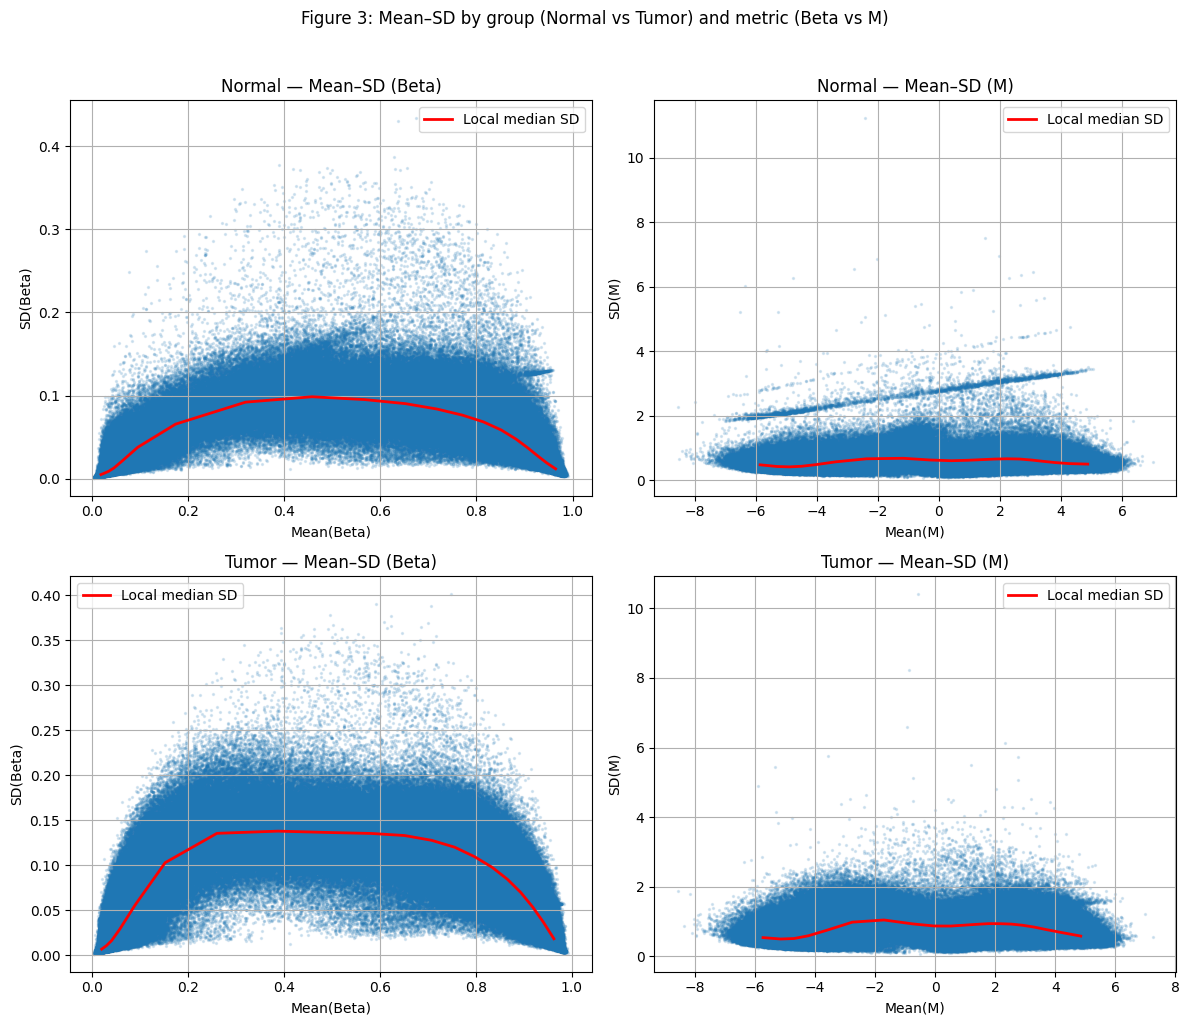

Saved figures:
 - fig1_empirical_vs_theoretical_dual.png
 - fig2_histograms_dual.png
 - fig3_mean_sd_bygroup.png


In [18]:
# Plot defaults
plt.rcParams["figure.figsize"]= (7, 5)
plt.rcParams["axes.grid"] = True

# Small numeric constants (paper context; here only for Beta->M conversion)
EPS = 1e-6  # numeric stability when converting Beta -> M

# 1) Split features / labels
feature_cols = [c for c in raw_dataset.columns if c != 'label']
X = raw_dataset[feature_cols].astype(float).clip(0.0, 1.0).copy()  # enforce [0,1]
y = raw_dataset['label'].astype(int).copy()

print("Matrix shape (samples x CpGs):", X.shape)
print("Label counts:\n", y.value_counts(dropna=False))

# 2) Derived M-values from Beta (logit transform)
def compute_M_from_beta(beta, eps=EPS):
    beta = beta.astype(float).clip(eps, 1.0 - eps)
    return np.log2(beta / (1.0 - beta))

betas = X
Ms = compute_M_from_beta(betas)

# Keep aligned indices/columns
betas.index, Ms.index = X.index, X.index
betas.columns, Ms.columns = X.columns, X.columns

print("Computed matrices -> Beta:", betas.shape, " | M:", Ms.shape)

# 3) Pick the "typical sample" (paper: single sample for Fig.1–2)
#    - Prefer a tumor sample (label==2)
def pick_sample_for_label(labels, target_label):
    idx = labels[labels == target_label].index
    return idx[0] if len(idx) > 0 else None

tumor_sample  = pick_sample_for_label(y, target_label=2)
normal_sample = pick_sample_for_label(y, target_label=0)
print("Tumor sample for Fig.1–2:", tumor_sample)
print("Normal sample for Fig.1–2:", normal_sample)

# 4) Figure 1 — Relationship M vs Beta
#    - LEFT: Theoretical curve (M vs Beta)
#    - RIGHT: Empirical scatter (the chosen sample) + theoretical overlay
#    Save: fig1_relationship.png
def figure1_empirical_vs_theoretical_dual(betas_df, Ms_df, tumor_sample, normal_sample,
                                          max_points=80000, m_lim=(-8, 8)):
    # Theoretical curve (M vs Beta)
    m_grid = np.linspace(m_lim[0], m_lim[1], 2000)
    beta_curve = (2.0**m_grid) / (1.0 + 2.0**m_grid)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    def _panel(ax, sample_name, title_suffix):
        bvals = betas_df.loc[sample_name].values
        mvals = Ms_df.loc[sample_name].values
        n = len(bvals)
        if n > max_points:
            idx = np.random.choice(n, size=max_points, replace=False)
            bvals = bvals[idx]; mvals = mvals[idx]
        # Theoretical curve (blue), Empirical scatter (red)
        ax.plot(beta_curve, m_grid, linewidth=2, linestyle='--', color='blue', label="Theoretical link")
        ax.scatter(bvals, mvals, s=2, alpha=0.25, color='red', label=f"Sample: {sample_name}")
        ax.set_xlim(0, 1); ax.set_ylim(*m_lim)
        ax.set_xlabel("Beta (sample)")
        ax.set_title(f"Empirical vs Theoretical — {title_suffix}")
        ax.legend(loc="lower right", fontsize=8)

    # Tumor panel
    if tumor_sample is not None:
        _panel(axes[0], tumor_sample, "Tumor")
        axes[0].set_ylabel("M")

    # Normal panel
    if normal_sample is not None:
        _panel(axes[1], normal_sample, "Normal")

    fig.suptitle("Figure 1: Empirical vs Theoretical (single-sample overlays)", y=1.02)
    fig.tight_layout()
    plt.savefig("fig1_empirical_vs_theoretical_dual.png", dpi=200, bbox_inches="tight")
    plt.show()
    
# 5) Figure 2 — Histograms (single sample) side-by-side
#    - LEFT: Beta histogram
#    - RIGHT: M histogram
#    Save: fig2_histograms.png
def figure2_histograms_dual(betas_df, Ms_df, tumor_sample, normal_sample, bins=60):
    fig, axes = plt.subplots(2, 2, figsize=(12, 9))

    # Tumor
    if tumor_sample is not None:
        bt = betas_df.loc[tumor_sample].values
        mt = Ms_df.loc[tumor_sample].values
        axes[0,0].hist(bt, bins=bins, alpha=0.9)
        axes[0,0].set_title(f"Tumor — Beta ({tumor_sample})"); axes[0,0].set_xlabel("Beta"); axes[0,0].set_ylabel("Frequency")
        axes[0,1].hist(mt, bins=bins, alpha=0.9)
        axes[0,1].set_title(f"Tumor — M ({tumor_sample})"); axes[0,1].set_xlabel("M"); axes[0,1].set_ylabel("Frequency")

    # Normal
    if normal_sample is not None:
        bn = betas_df.loc[normal_sample].values
        mn = Ms_df.loc[normal_sample].values
        axes[1,0].hist(bn, bins=bins, alpha=0.9)
        axes[1,0].set_title(f"Normal — Beta ({normal_sample})"); axes[1,0].set_xlabel("Beta"); axes[1,0].set_ylabel("Frequency")
        axes[1,1].hist(mn, bins=bins, alpha=0.9)
        axes[1,1].set_title(f"Normal — M ({normal_sample})"); axes[1,1].set_xlabel("M"); axes[1,1].set_ylabel("Frequency")

    fig.suptitle("Figure 2: Beta/M histograms for Tumor and Normal samples", y=1.02)
    fig.tight_layout()
    plt.savefig("fig2_histograms_dual.png", dpi=200, bbox_inches="tight")
    plt.show()
    
# 6) Figure 3 — Mean–SD relation (across samples, pooled) side-by-side
#    - For each CpG (column): mean across samples vs SD across samples
#    - LEFT: Beta (expected heteroscedasticity near 0/1)
#    - RIGHT: M (approx. homoscedastic)
#    Save: fig3_mean_sd.png
def _binned_median_sd(means, sds, n_bins=20):
    df = pd.DataFrame({"mean": means, "sd": sds}).dropna().sort_values("mean")
    bins = np.array_split(df, n_bins)
    x = [b["mean"].median() for b in bins if len(b)]
    y = [b["sd"].median() for b in bins if len(b)]
    return np.array(x), np.array(y)

def figure3_mean_sd_bygroup(betas_df, Ms_df, labels, n_bins=20):
    B_norm = betas_df.loc[labels == 0];  M_norm = Ms_df.loc[labels == 0]
    B_tum  = betas_df.loc[labels == 2];  M_tum  = Ms_df.loc[labels == 2]

    def _mean_sd(B, M):
        return (B.mean(axis=0).values, B.std(axis=0, ddof=1).values,
                M.mean(axis=0).values, M.std(axis=0, ddof=1).values)

    nb_mean, nb_sd, nm_mean, nm_sd = _mean_sd(B_norm, M_norm)
    tb_mean, tb_sd, tm_mean, tm_sd = _mean_sd(B_tum,  M_tum)

    # Binned trends
    nxb, nyb = _binned_median_sd(nb_mean, nb_sd, n_bins=n_bins)
    nxm, nym = _binned_median_sd(nm_mean, nm_sd, n_bins=n_bins)
    txb, tyb = _binned_median_sd(tb_mean, tb_sd, n_bins=n_bins)
    txm, tym = _binned_median_sd(tm_mean, tm_sd, n_bins=n_bins)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Normal — Beta
    axes[0,0].scatter(nb_mean, nb_sd, s=2, alpha=0.15)
    axes[0,0].plot(nxb, nyb, linewidth=2, label="Local median SD", color="red")
    axes[0,0].set_title("Normal — Mean–SD (Beta)"); axes[0,0].set_xlabel("Mean(Beta)"); axes[0,0].set_ylabel("SD(Beta)"); axes[0,0].legend()

    # Normal — M]]]]]
    axes[0,1].scatter(nm_mean, nm_sd, s=2, alpha=0.15)
    axes[0,1].plot(nxm, nym, linewidth=2, label="Local median SD", color="red")
    axes[0,1].set_title("Normal — Mean–SD (M)"); axes[0,1].set_xlabel("Mean(M)"); axes[0,1].set_ylabel("SD(M)"); axes[0,1].legend()

    # Tumor — Beta
    axes[1,0].scatter(tb_mean, tb_sd, s=2, alpha=0.15)
    axes[1,0].plot(txb, tyb, linewidth=2, label="Local median SD", color="red")
    axes[1,0].set_title("Tumor — Mean–SD (Beta)"); axes[1,0].set_xlabel("Mean(Beta)"); axes[1,0].set_ylabel("SD(Beta)"); axes[1,0].legend()

    # Tumor — M
    axes[1,1].scatter(tm_mean, tm_sd, s=2, alpha=0.15)
    axes[1,1].plot(txm, tym, linewidth=2, label="Local median SD", color="red")
    axes[1,1].set_title("Tumor — Mean–SD (M)"); axes[1,1].set_xlabel("Mean(M)"); axes[1,1].set_ylabel("SD(M)"); axes[1,1].legend()

    fig.suptitle("Figure 3: Mean–SD by group (Normal vs Tumor) and metric (Beta vs M)", y=1.02)
    fig.tight_layout()
    plt.savefig("fig3_mean_sd_bygroup.png", dpi=200, bbox_inches="tight")
    plt.show()

figure1_empirical_vs_theoretical_dual(betas, Ms, tumor_sample, normal_sample, max_points=80000, m_lim=(-8, 8))
figure2_histograms_dual(betas, Ms, tumor_sample, normal_sample, bins=60)
figure3_mean_sd_bygroup(betas, Ms, y, n_bins=20)

print("Saved figures:")
print(" - fig1_empirical_vs_theoretical_dual.png")
print(" - fig2_histograms_dual.png")
print(" - fig3_mean_sd_bygroup.png")]

## References

[1] National Center for Biotechnology Information, “GSE69914 on GEO Datasets,” *Gene Expression Omnibus (GEO)*, 2015. [Online]. Available: [https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE69914](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE69914). 

[2] P. Du *et al.*, “Comparison of Beta-value and M-value methods for quantifying methylation levels by microarray analysis,” **BMC Bioinformatics**, 11:587, 2010. DOI: 10.1186/1471-2105-11-587.
